# Fourier Analysis Exercises


## Part 1: Simulate different synthetic signals (sinusoids, square waves, impulses, …)

- Compute DFT and analyze frequencies
- Test the different properties of the DFT (linearity, time-shifting, …)
- Review the effect of different sampling rates on the DFT


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import time_plot, get_figure, fit_sinusoids, plot_fft

### 1.1 Simulate synthetic signals


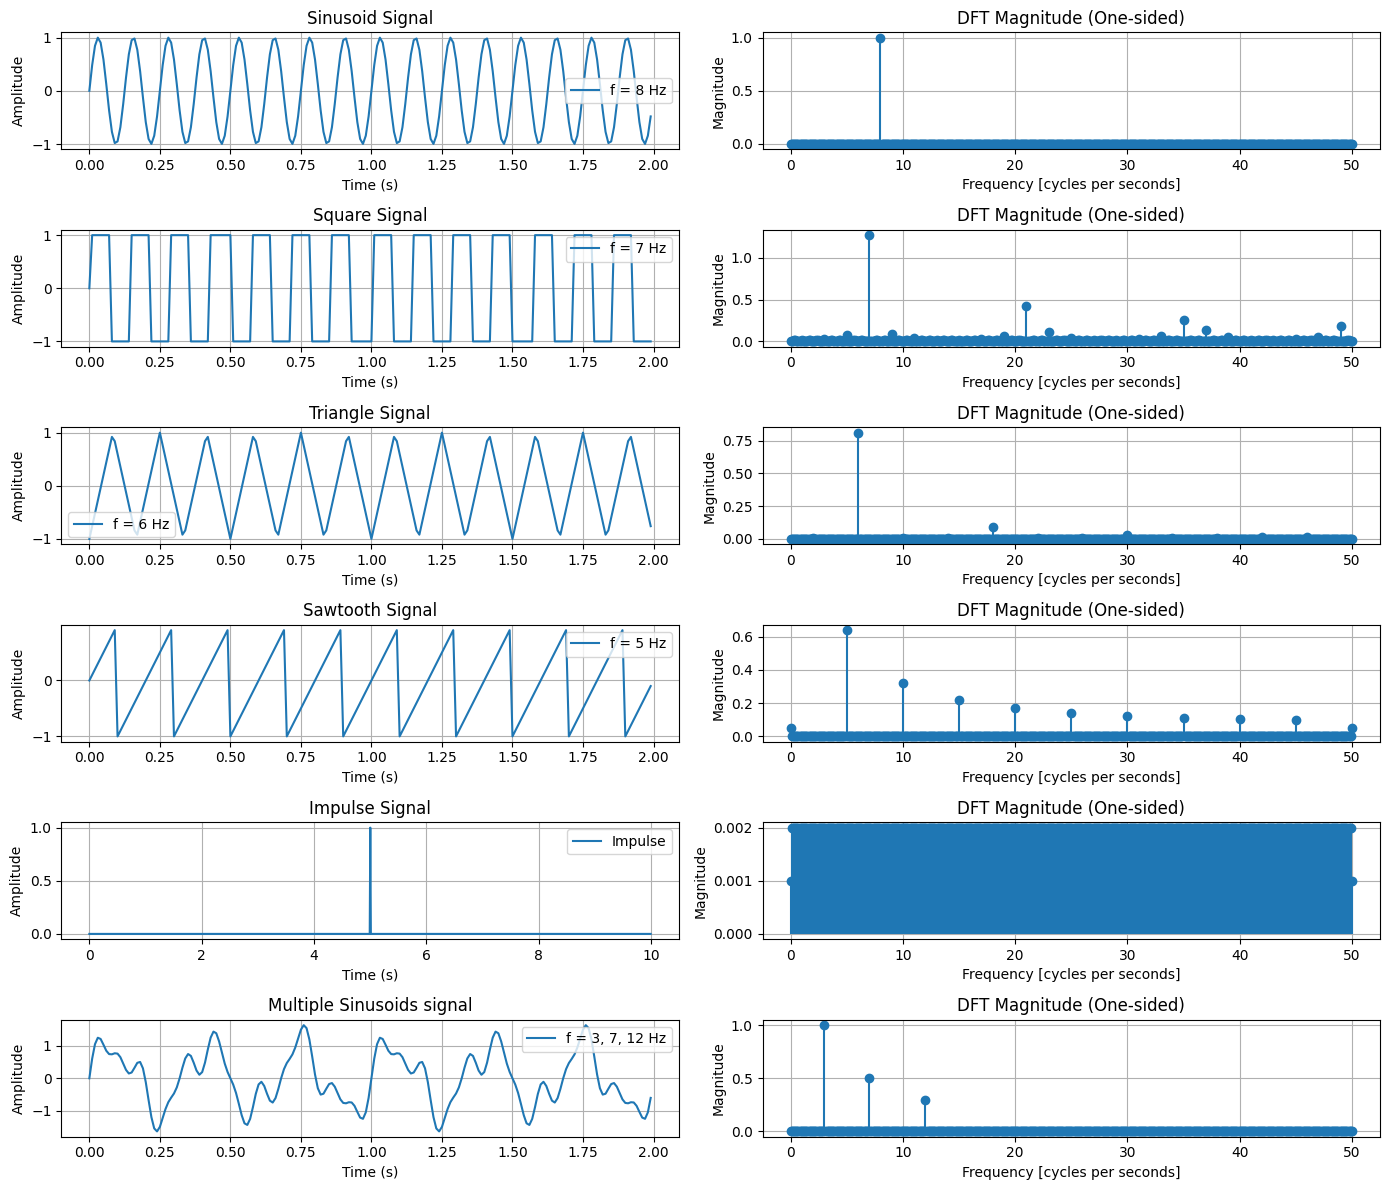

In [53]:
n_samples = 1000
sampling_rate = 100
t = np.arange(n_samples) / sampling_rate
dt = 1 / sampling_rate

# Sinusoid
frequency_sin = 8
sinusoid = np.sin(2 * np.pi * frequency_sin * t)

# Square
frequency_square = 7
square = np.sign(np.sin(2 * np.pi * frequency_square * t))

# Triangle
frequency_triangle = 6
triangle = 2 * np.abs(2 * (t * frequency_triangle - np.floor(t * frequency_triangle + 0.5))) - 1

# Sawtooth
frequency_sawtooth = 5
sawtooth = 2 * (t * frequency_sawtooth - np.floor(t * frequency_sawtooth + 0.5))

# Impulse
impulse = np.zeros_like(t)
impulse[n_samples // 2] = 1

# Multiple sinusoids
freq1, freq2, freq3 = 3, 7, 12
multi_sinusoid = (np.sin(2 * np.pi * freq1 * t) +
                  0.5 * np.sin(2 * np.pi * freq2 * t) +
                  0.3 * np.sin(2 * np.pi * freq3 * t))

# Plot all signals
fig, axs = get_figure(nrows=6, ncols=2, figsize=(14, 12))

# Sinusoid
axs[0].plot(t[:200], sinusoid[:200], label=f'f = {frequency_sin} Hz')
axs[0].set_title('Sinusoid Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
plot_fft(axs[1], sinusoid, sample_spacing=dt, sample_spacing_name='seconds')

# Square
axs[2].plot(t[:200], square[:200], label=f'f = {frequency_square} Hz')
axs[2].set_title('Square Signal')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()
plot_fft(axs[3], square, sample_spacing=dt, sample_spacing_name='seconds')

# Triangle
axs[4].plot(t[:200], triangle[:200], label=f'f = {frequency_triangle} Hz')
axs[4].set_title('Triangle Signal')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Amplitude')
axs[4].legend()
plot_fft(axs[5], triangle, sample_spacing=dt, sample_spacing_name='seconds')

# Sawtooth
axs[6].plot(t[:200], sawtooth[:200], label=f'f = {frequency_sawtooth} Hz')
axs[6].set_title('Sawtooth Signal')
axs[6].set_xlabel('Time (s)')
axs[6].set_ylabel('Amplitude')
axs[6].legend()
plot_fft(axs[7], sawtooth, sample_spacing=dt, sample_spacing_name='seconds')

# Impulse
axs[8].plot(t, impulse, label='Impulse')
axs[8].set_title('Impulse Signal')
axs[8].set_xlabel('Time (s)')
axs[8].set_ylabel('Amplitude')
axs[8].legend()
plot_fft(axs[9], impulse, sample_spacing=dt, sample_spacing_name='seconds')

# Multiple Sinusoids
axs[10].plot(t[:200], multi_sinusoid[:200], label=f'f = {freq1}, {freq2}, {freq3} Hz')
axs[10].set_title('Multiple Sinusoids signal')
axs[10].set_xlabel('Time (s)')
axs[10].set_ylabel('Amplitude')
axs[10].legend()
plot_fft(axs[11], multi_sinusoid, sample_spacing=dt, sample_spacing_name='seconds')

plt.tight_layout()
plt.show()


### 1.2 Analyze DFT frequencies


In [129]:
def analyze_dft_frequencies(title: str, signal: pd.Series, sample_spacing: float, base_frequency: list[int] | int | None = None, sample_spacing_name: str = "seconds", include_plot=False):
    if include_plot:
        fig, ax = get_figure()
        plot_fft(ax[0], signal, sample_spacing=sample_spacing, sample_spacing_name=sample_spacing_name)
        plt.tight_layout()
        plt.show()
    n = len(signal)
    xf = np.fft.fftfreq(n, d=sample_spacing)
    spectrum = np.abs(np.fft.fft(signal) / n)
    half_n = n // 2 + 1 if n % 2 == 0 else (n + 1) // 2
    xf = xf[:half_n]
    xf[-1] = abs(xf[-1])  # flip Nyquist to positive (numpy returns negative nyquist freq)
    spectrum = spectrum[:half_n]
    if n % 2 == 0:
        spectrum[1:-1] *= 2  # double interior bins
    else:
        spectrum[1:] *= 2  # double everything but DC
    max_magnitude = np.max(spectrum)
    threshold_magnitude = max_magnitude * 0.05  # 5% of max magnitude
    indices = np.where(spectrum >= threshold_magnitude)[0]
    sorted_indices = sorted(indices, key=lambda i: np.abs(spectrum[i]), reverse=True)
    print(f"{title} DFT Analysis:")
    if base_frequency:
        print(f"Expected frequency/frequencies: {base_frequency if isinstance(base_frequency, int) else ', '.join((str(f) for f in base_frequency))} Hz")
    print("Detected peaks:")
    print(f"  {len(sorted_indices)} peaks detected")
    if len(sorted_indices) > 10:
        print("  Frequency Extract:")
        sorted_indices = sorted_indices if len(sorted_indices) <= 10 else sorted_indices[:10]
    else:
        print("  Frequencies")
    for idx in sorted_indices:
        print(f"    Frequency: {xf[idx]:.2f} Hz, Magnitude: {spectrum[idx]:.4f}")

    print("\n" + "="*50 + "\n")


In [55]:
analyze_dft_frequencies("Sinusoid", sinusoid, dt, frequency_sin)
analyze_dft_frequencies("Square", square, dt, frequency_square)
analyze_dft_frequencies("Triangle", triangle, dt, frequency_triangle)
analyze_dft_frequencies("Sawtooth", sawtooth, dt, frequency_sawtooth)
analyze_dft_frequencies("Impulse", impulse, dt, None)
analyze_dft_frequencies("Multiple Sinusoids", multi_sinusoid, dt, [freq1, freq2, freq3])

Sinusoid DFT Analysis:
Expected frequency/frequencies: 8 Hz
Detected peaks:
  1 peaks detected
  Frequencies
    Frequency: 8.00 Hz, Magnitude: 1.0000


Square DFT Analysis:
Expected frequency/frequencies: 7 Hz
Detected peaks:
  9 peaks detected
  Frequencies
    Frequency: 7.00 Hz, Magnitude: 1.2729
    Frequency: 21.00 Hz, Magnitude: 0.4234
    Frequency: 35.00 Hz, Magnitude: 0.2529
    Frequency: 49.00 Hz, Magnitude: 0.1795
    Frequency: 37.00 Hz, Magnitude: 0.1384
    Frequency: 23.00 Hz, Magnitude: 0.1120
    Frequency: 9.00 Hz, Magnitude: 0.0935
    Frequency: 5.00 Hz, Magnitude: 0.0797
    Frequency: 19.00 Hz, Magnitude: 0.0691


Triangle DFT Analysis:
Expected frequency/frequencies: 6 Hz
Detected peaks:
  2 peaks detected
  Frequencies
    Frequency: 6.00 Hz, Magnitude: 0.8116
    Frequency: 18.00 Hz, Magnitude: 0.0911


Sawtooth DFT Analysis:
Expected frequency/frequencies: 5 Hz
Detected peaks:
  11 peaks detected
  Frequency Extract:
    Frequency: 5.00 Hz, Magnitude: 0.6392

For the sinusoid and multiple sinusoid signals, we extract exaclty the frequencies we would expect. For pattern signals such as sawtooth, triangle or square the extracted frequencies are also finite and have a relation to the base frequency, such as a multiple of three or four of the base frequency.

### 1.3 Test DFT properties


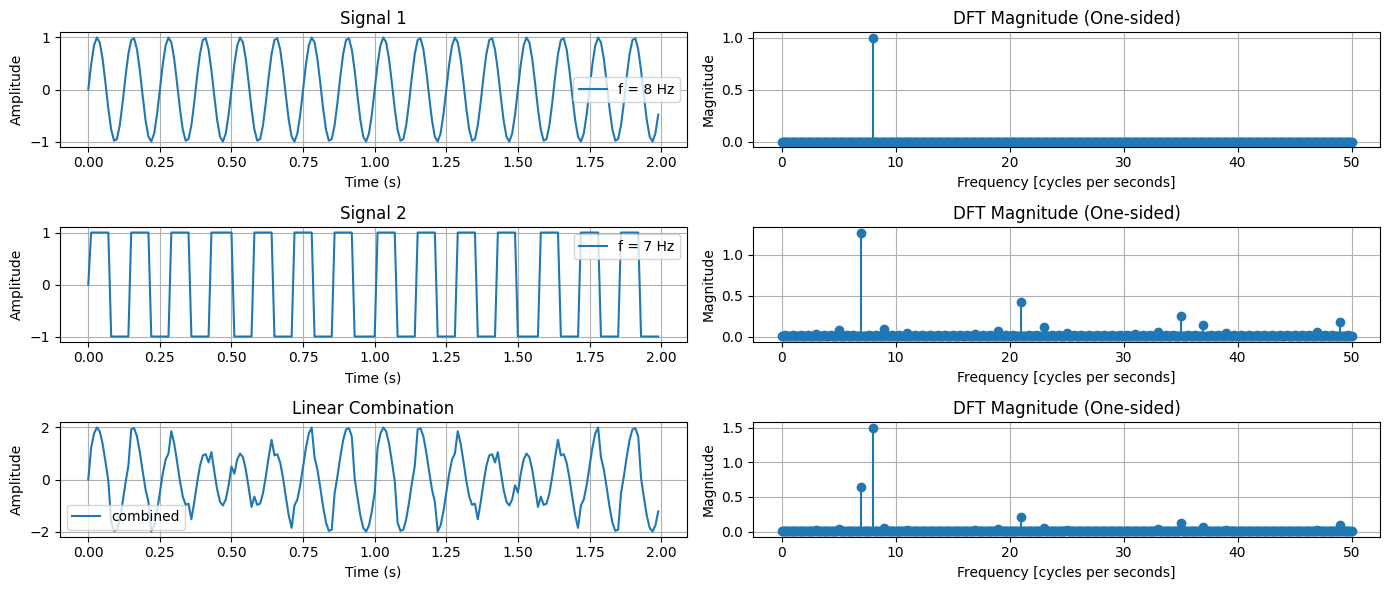

DFT Property 1: Linearity
a = 1.5, b = 0.5
Max error |DFT(a*x + b*y) - a*DFT(x) - b*DFT(y)|: 1.00e-16
Linearity property satisfied: True



In [61]:
# Property 1: Linearity
signal1, magnitude1, f1 = sinusoid, 1.5, frequency_sin
signal2, magnitude2, f2 = square, 0.5, frequency_square

# Compute DFT of linear combination
combination = magnitude1 * signal1 + magnitude2 * signal2

fig, axs = get_figure(nrows=3, ncols=2, figsize=(14, 6))
axs[0].plot(t[:200], signal1[:200], label=f"f = {f1} Hz")
axs[0].set_title('Signal 1')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
xf1, yf1, spectrum1 = plot_fft(axs[1], signal1, sample_spacing=dt, sample_spacing_name='seconds', return_fft=True)

axs[2].plot(t[:200], signal2[:200], label=f"f = {f2} Hz")
axs[2].set_title('Signal 2')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()
xf2, yf2, spectrum2 = plot_fft(axs[3], signal2, sample_spacing=dt, sample_spacing_name='seconds', return_fft=True)

axs[4].plot(t[:200], combination[:200], label="combined")
axs[4].set_title('Linear Combination')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Amplitude')
axs[4].legend()
xfc, yfc, spectrumc = plot_fft(axs[5], combination, sample_spacing=dt, sample_spacing_name='seconds', return_fft=True)
plt.tight_layout()
plt.show()

yfc_lin = magnitude1 * yf1 + magnitude2 * yf2
linearity_error = np.max(np.abs(yfc_lin - yfc))
print("DFT Property 1: Linearity")
print(f"a = {magnitude1}, b = {magnitude2}")
print(f"Max error |DFT(a*x + b*y) - a*DFT(x) - b*DFT(y)|: {linearity_error:.2e}")
print(f"Linearity property satisfied: {linearity_error < 1e-10}\n")


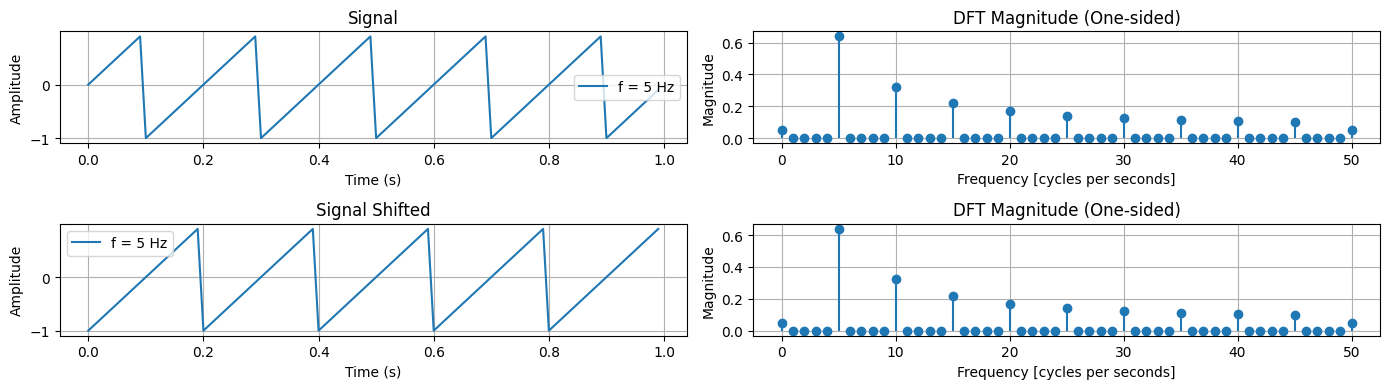

DFT Property 2: Time-shifting
Shift: 10 samples = 0.1000 seconds
Max error in magnitude: 1.11e-16
Time-shifting property satisfied: True



In [69]:
# Property 2: Time-shifting
signal, f = sawtooth[:100], frequency_sawtooth
shift_samples = 10
signal_shifted = np.roll(signal, shift_samples)

fig, axs = get_figure(nrows=2, ncols=2, figsize=(14, 4))
axs[0].plot(t[:100], signal, label=f"f = {f} Hz")
axs[0].set_title('Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
xf, yf, spectrum = plot_fft(axs[1], signal, sample_spacing=dt, sample_spacing_name='seconds', return_fft=True)

axs[2].plot(t[:100], signal_shifted, label=f"f = {f} Hz")
axs[2].set_title('Signal Shifted')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()
xfs, yfs, spectrums = plot_fft(axs[3], signal_shifted, sample_spacing=dt, sample_spacing_name='seconds', return_fft=True)
plt.tight_layout()
plt.show()

# Expected shift in frequency domain
freq_bins = np.fft.fftfreq(len(signal), d=dt)
phase_shift = np.exp(-2j * np.pi * freq_bins * shift_samples * dt)
yfs_expected = yfs * phase_shift[:1 + len(phase_shift) // 2]

# Check if they are equal (compare magnitudes, as phase can be affected)
magnitude_error = np.max(np.abs(np.abs(yfs) - np.abs(yfs_expected)))
print("DFT Property 2: Time-shifting")
print(f"Shift: {shift_samples} samples = {shift_samples * dt:.4f} seconds")
print(f"Max error in magnitude: {magnitude_error:.2e}")
print(f"Time-shifting property satisfied: {magnitude_error < 1e-10}\n")


In [71]:
# Property 3: Parseval's Theorem
# Energy in time domain = Energy in frequency domain
# sum(|x[n]|^2) = (1/N) * sum(|X[k]|^2)

signal = triangle[:100]
energy_time = np.sum(signal**2)
fft_signal = np.fft.fft(signal)
energy_freq = (1/len(signal)) * np.sum(np.abs(fft_signal)**2)

print("DFT Property 3: Parseval's Theorem")
print(f"Energy in time domain: {energy_time:.4f}")
print(f"Energy in frequency domain: {energy_freq:.4f}")
print(f"Error: {np.abs(energy_time - energy_freq):.2e}")
print(f"Parseval's theorem satisfied: {np.abs(energy_time - energy_freq) < 1e-10}\n")


DFT Property 3: Parseval's Theorem
Energy in time domain: 33.4400
Energy in frequency domain: 33.4400
Error: 1.42e-14
Parseval's theorem satisfied: True



### 1.4 Effect of different sampling rates on DFT


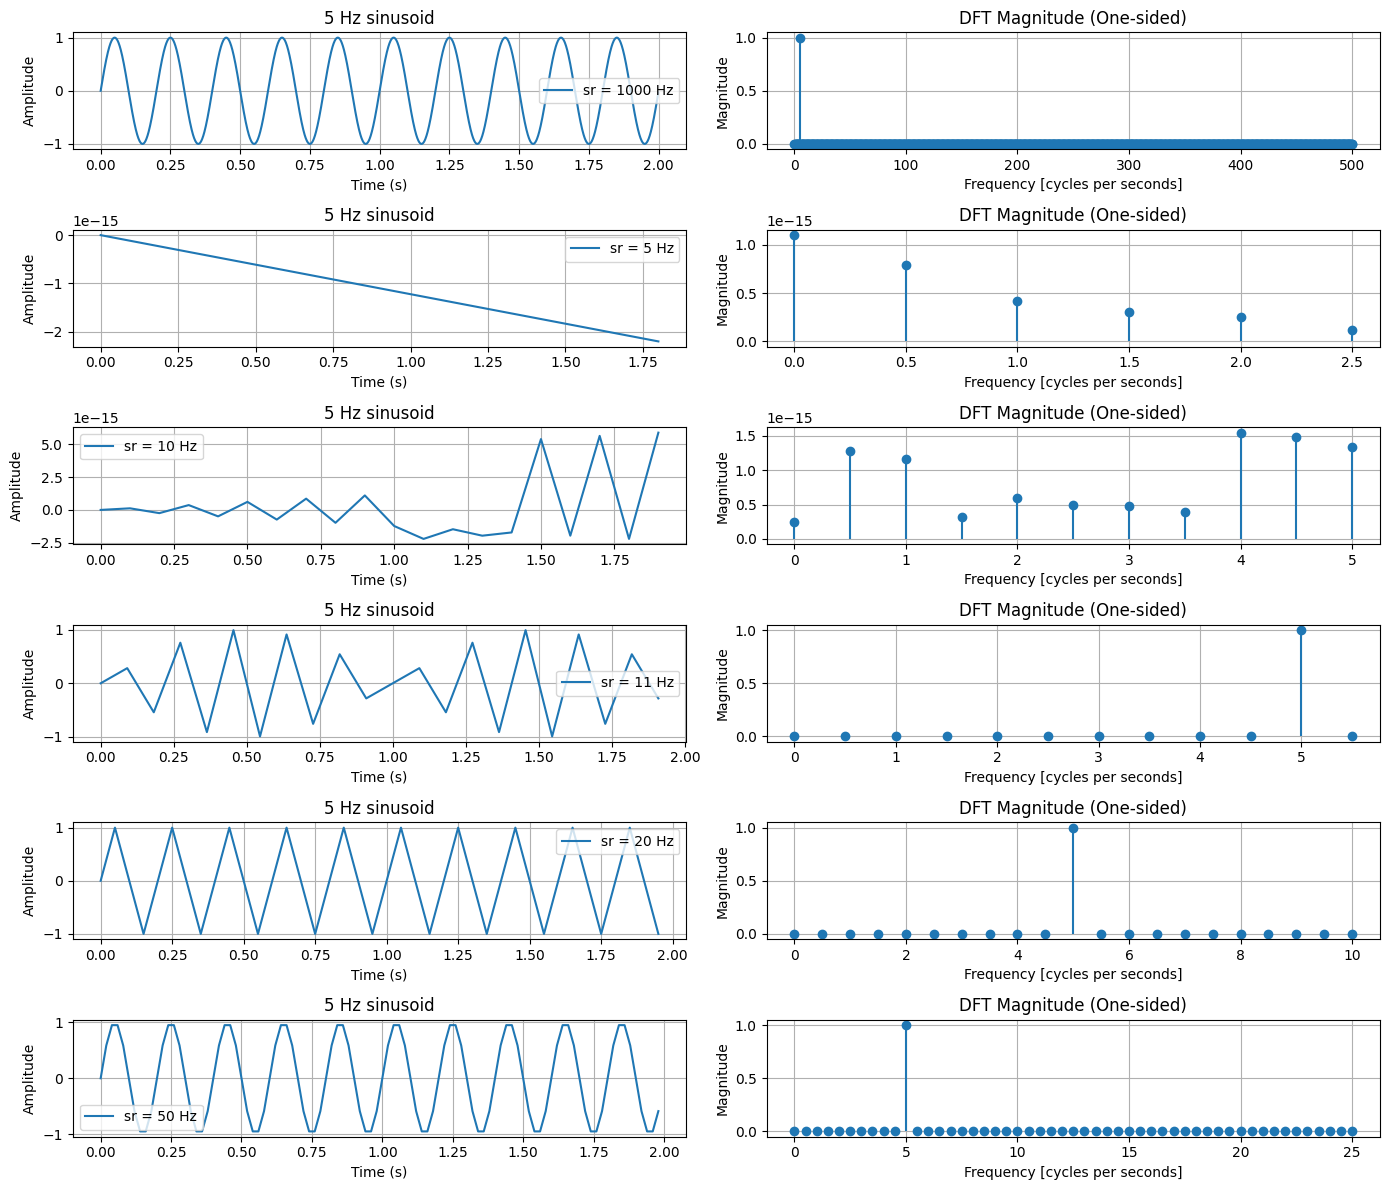

In [80]:
frequency = 5  # Hz
sampling_rates = [1000, 5, 10, 11, 20, 50]
fig, axs = get_figure(nrows=6, ncols=2, figsize=(14, 12))
for idx, sr in enumerate(sampling_rates):
    n_samples = sr * 2
    dt_sampled = 1 / sr
    t_sampled = np.arange(n_samples) / sr
    signal_sampled = np.sin(2 * np.pi * frequency * t_sampled)

    axs[idx * 2].plot(t_sampled, signal_sampled, label=f"sr = {sr} Hz")
    axs[idx * 2].set_title('5 Hz sinusoid')
    axs[idx * 2].set_xlabel('Time (s)')
    axs[idx * 2].set_ylabel('Amplitude')
    axs[idx * 2].legend()
    plot_fft(axs[idx * 2 + 1], signal_sampled, sample_spacing=dt_sampled, sample_spacing_name='seconds')

plt.tight_layout()
plt.show()


We see that below and at the Nyquist frequency of 10 Hz (2 * the original signal frequency) the sampled signal does not in any way resemble the sinusoid we expect and the DFT frequencies are also all over the place. As soon as we increase the sample frequency to 11 Hz (which is only 1 Hz above the Nyquist frequency), the DFT only picks up the frequency of 5Hz, which matches with the expected base frqeuency of the signal.

## Part 2: Model real-world time series
- Fit sinusoids with known frequencies
- Compute DFT and analyze dominant frequencies
- Compare empirical results with your initial expectations
- Review how the different DFT components contribute to the signal


In [110]:
url = "https://data.open-power-system-data.org/time_series/latest/time_series_60min_singleindex.csv"
df = pd.read_csv(
    url,
    parse_dates=["utc_timestamp"],
    index_col="utc_timestamp",
)
df_ch_solar_generation = df["CH_solar_generation_actual"].astype("float32")  # CH hourly solar generation in MW
df_ch_solar_generation.dropna(inplace=True)
cutoff_date = df_ch_solar_generation.index.max() - pd.DateOffset(months=3)
df_ch_solar_generation = df_ch_solar_generation[(df_ch_solar_generation.index >= cutoff_date)]
df_ch_solar_generation

utc_timestamp
2019-09-30 16:00:00+00:00     24.990000
2019-09-30 17:00:00+00:00      1.430000
2019-09-30 18:00:00+00:00      0.010000
2019-09-30 19:00:00+00:00      0.000000
2019-09-30 20:00:00+00:00      0.000000
                                ...    
2020-09-30 12:00:00+00:00    141.750000
2020-09-30 13:00:00+00:00    121.779999
2020-09-30 14:00:00+00:00     92.559998
2020-09-30 15:00:00+00:00     56.509998
2020-09-30 16:00:00+00:00     19.620001
Name: CH_solar_generation_actual, Length: 8785, dtype: float32

In [107]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

df = pd.read_csv(
    url,
    parse_dates=["Date"],
    index_col="Date"
)
df_min_temp = df["Temp"].astype("float32")  # Daily minimum temperature in Melbourne Australia
cutoff_date = df_min_temp.index.max() - pd.DateOffset(years=5)
df_min_temp = df_min_temp[(df_min_temp.index >= cutoff_date)]
df_min_temp


Date
1985-12-31    14.4
1986-01-01    12.9
1986-01-02    13.8
1986-01-03    10.6
1986-01-04    12.6
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 1826, dtype: float32

In [108]:
url = "https://stooq.com/q/d/l/?s=%5Espx&i=d"

df = pd.read_csv(
    url,
    parse_dates=["Date"],
    index_col="Date"
)
df_sp500_close = df["Close"].astype("float32")  # Daily closing price of S&P 500
cutoff_date = df_sp500_close.index.max() - pd.DateOffset(years=5)
df_sp500_close = df_sp500_close[(df_sp500_close.index >= cutoff_date)]
df_sp500_close


Date
2020-11-16    3626.909912
2020-11-17    3609.530029
2020-11-18    3567.790039
2020-11-19    3581.870117
2020-11-20    3557.540039
                 ...     
2025-11-10    6832.430176
2025-11-11    6846.609863
2025-11-12    6850.919922
2025-11-13    6737.490234
2025-11-14    6734.109863
Name: Close, Length: 1256, dtype: float32

### 2.1 / 2.2 Fit sinusoids with known frequencies and compute DFT/analyze dominant frequencies


In [117]:
def fit_sinusoids_on_data(data: pd.Series, frequencies: list[float], title: str, label: str, unit: str):
    results, mu, sinusoids = fit_sinusoids(data, frequencies=frequencies)

    print(f"Sinusoid Fitting Results ({title}):")
    print(f"Mean: {mu:.2f} {unit}")
    print(f"Fitted sinusoid coefficients:")
    print(results.summary())

    fig, axs = get_figure(nrows=2, ncols=1, figsize=(14, 8))

    time_plot(
        x=data.index,
        y=data.values,
        title=title,
        xlabel='Date',
        ylabel=f'{label} [{unit}]',
        ax=axs[0],
    )

    # Fitted values
    axs[0].plot(data.index, results.fittedvalues, label='Fitted sinusoid + mean',
                color='red', linewidth=2, linestyle='--')
    axs[0].legend()

    # Residuals
    residuals = data.values - results.fittedvalues
    axs[1].plot(data.index, residuals, label='Residuals')
    axs[1].set_title('Residuals from sinusoid fit')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel(f'Residual [{unit}]')
    axs[1].axhline(y=0, color='r', linestyle='--', alpha=0.3)
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


Sinusoid Fitting Results (Hourly solar power production in Switzerland):
Mean: 384.66 MW
Fitted sinusoid coefficients:
                                OLS Regression Results                                
Dep. Variable:     CH_solar_generation_actual   R-squared:                       0.750
Model:                                    OLS   Adj. R-squared:                  0.749
Method:                         Least Squares   F-statistic:                     1652.
Date:                        Sun, 16 Nov 2025   Prob (F-statistic):               0.00
Time:                                16:32:01   Log-Likelihood:                -15399.
No. Observations:                        2209   AIC:                         3.081e+04
Df Residuals:                            2204   BIC:                         3.084e+04
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
           

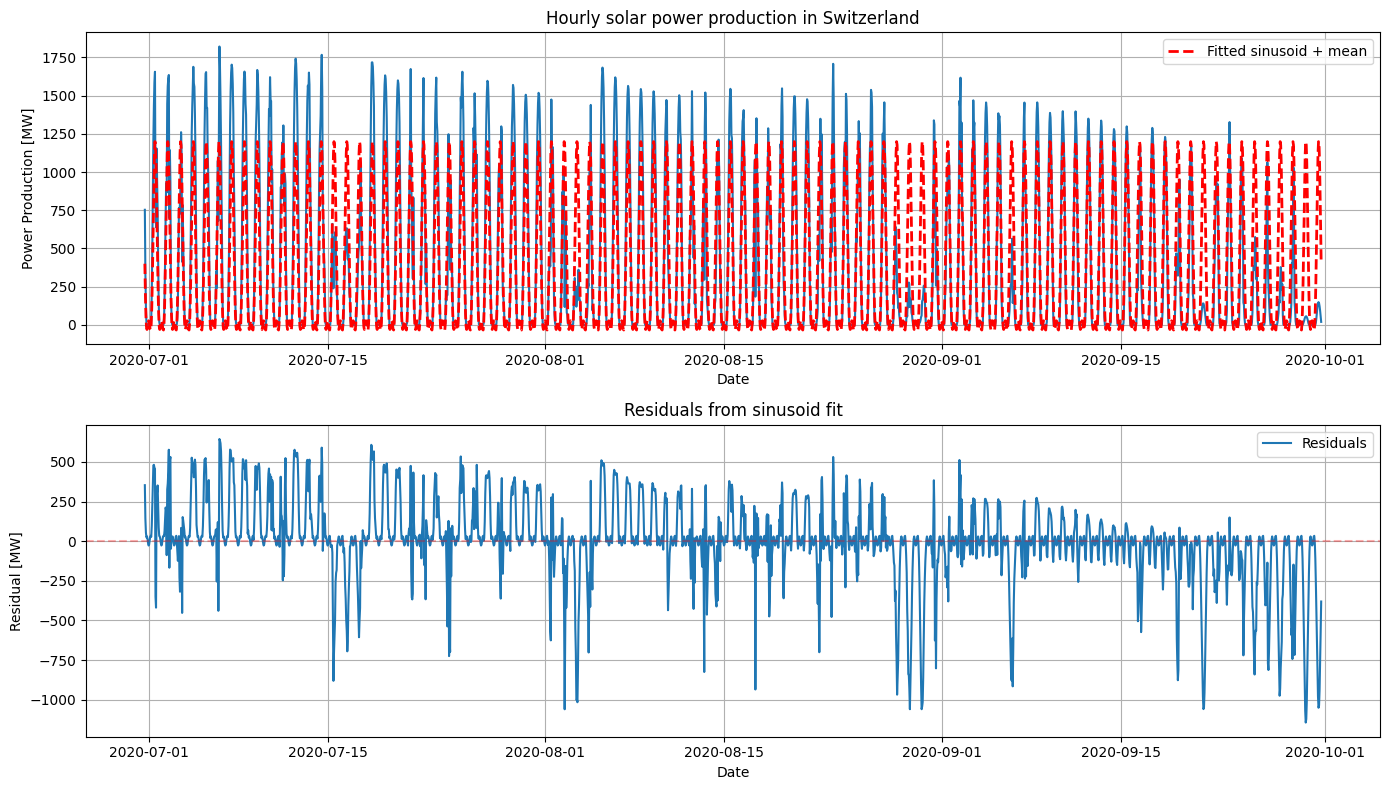

In [150]:
fit_sinusoids_on_data(df_ch_solar_generation, [1/24, 1/12], "Hourly solar power production in Switzerland", "Power Production", "MW")

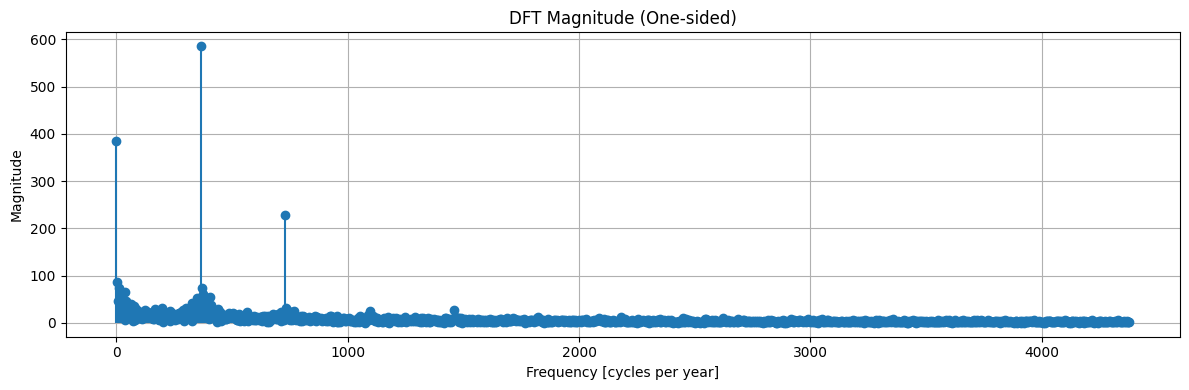

Hourly solar power production in Switzerland DFT Analysis:
Detected peaks:
  38 peaks detected
  Frequency Extract:
    Frequency: 364.83 Hz, Magnitude: 585.8602
    Frequency: 0.00 Hz, Magnitude: 384.6677
    Frequency: 729.67 Hz, Magnitude: 228.4212
    Frequency: 3.97 Hz, Magnitude: 85.9236
    Frequency: 368.80 Hz, Magnitude: 73.9293
    Frequency: 11.90 Hz, Magnitude: 72.8416
    Frequency: 15.86 Hz, Magnitude: 67.6338
    Frequency: 39.66 Hz, Magnitude: 66.1348
    Frequency: 376.73 Hz, Magnitude: 60.4976
    Frequency: 404.49 Hz, Magnitude: 54.9517




In [142]:
analyze_dft_frequencies("Hourly solar power production in Switzerland", df_ch_solar_generation, 1/8760, sample_spacing_name="year", include_plot=True)

The expectation was that the daily solar power production in Switzerland would have clear daily and half-daily patterns. Half-daily, because throughout halt of the day production is basically zero and during the other half, production is non-zero. The fitting of these sinusoids covered the pattern expressed in the data quite well. The following DFT shows that these sinusoids are the largest contributors to the signal (together with the DC part), but there are also quarterly (3.97 Hz) and monthly (11.9 Hz) signals that can clearly be mapped to a calendar pattern. There are additional frequencies still, that add to the final signal with most of them in proximity of other frequencies discussed.

---

Sinusoid Fitting Results (Daily minimum temperature in Melbourne Australia):
Mean: 11.31 °C
Fitted sinusoid coefficients:
                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     1034.
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          8.60e-301
Time:                        15:58:01   Log-Likelihood:                -4368.4
No. Observations:                1826   AIC:                             8743.
Df Residuals:                    1823   BIC:                             8759.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

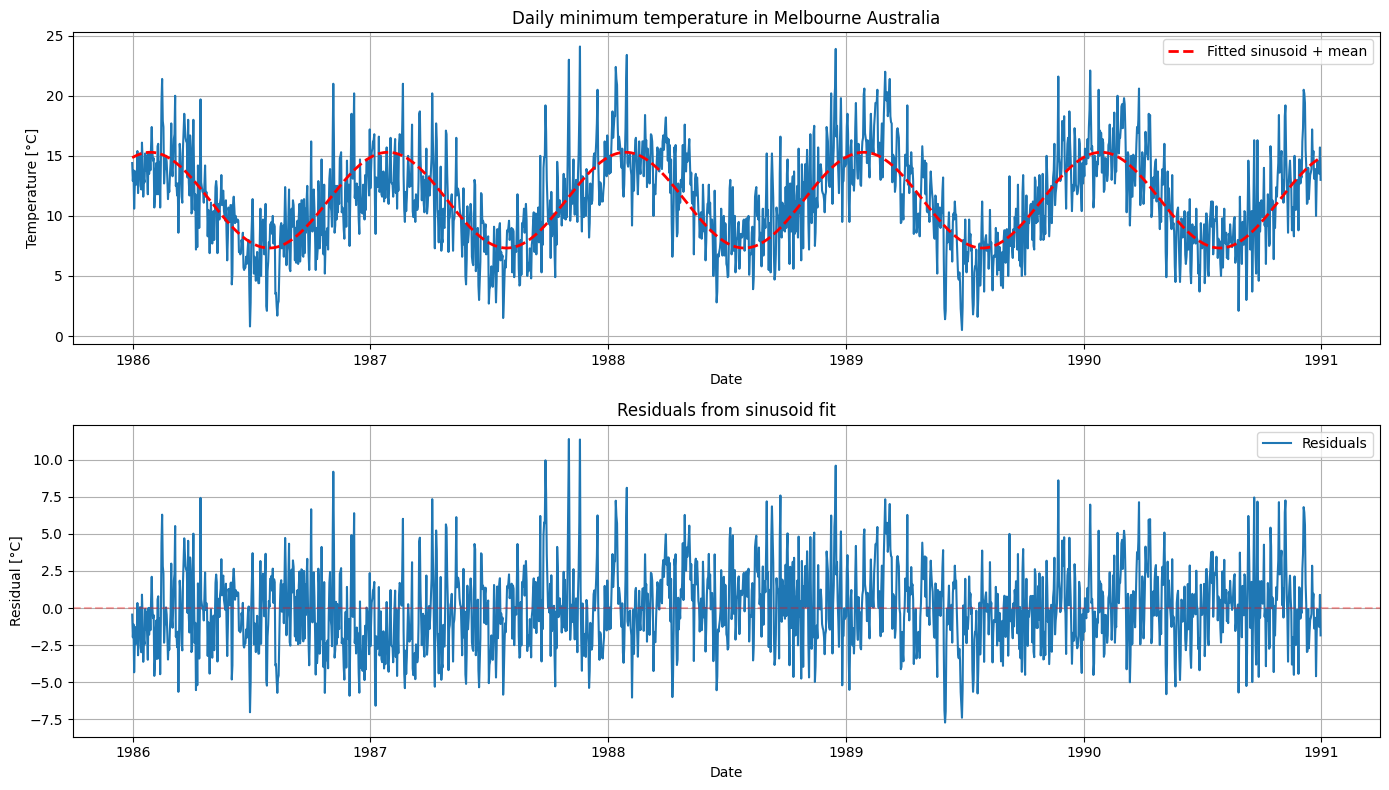

In [119]:
fit_sinusoids_on_data(df_min_temp, [1/365], "Daily minimum temperature in Melbourne Australia", "Temperature", "°C")

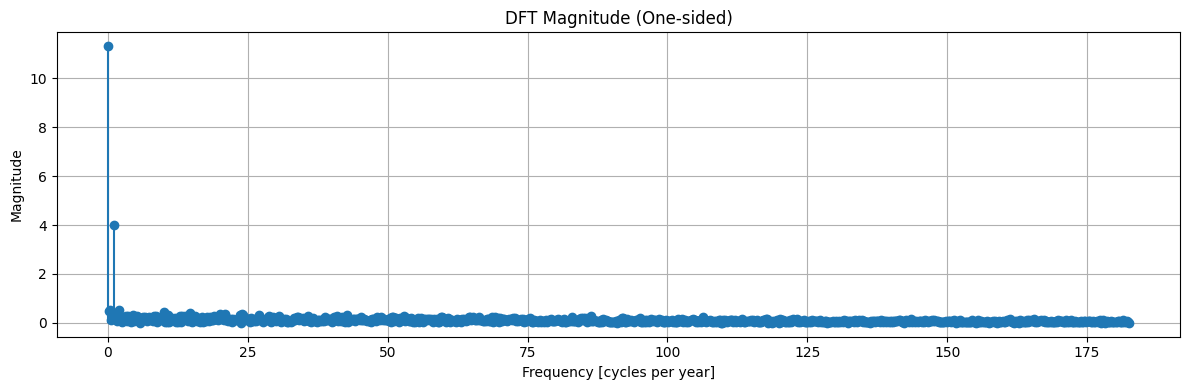

Daily minimum temperature in Melbourne Australia DFT Analysis:
Detected peaks:
  2 peaks detected
  Frequencies
    Frequency: 0.00 Hz, Magnitude: 11.3137
    Frequency: 1.00 Hz, Magnitude: 3.9860




In [145]:
analyze_dft_frequencies("Daily minimum temperature in Melbourne Australia", df_min_temp, 1/365, sample_spacing_name="year", include_plot=True)

For the daily minimal temperature in Melbourne the expectation was that the only contributing frequency was that with a period of a year. The residuals of the fitted sinusoid also shows a reasonably good fit with the uncaptured signal resembling noise. This is backed up by the DFT, which shows the only dominant frequency other than the DC part to be at 1 Hz, meaning a sinusoid with the period of a year. The rest of the signals then stems from all other frequencies with diminishingly small magnitudes.

---

Sinusoid Fitting Results (Daily closing price of S&P 500):
Mean: 4786.36 $US
Fitted sinusoid coefficients:
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.216
Date:                Sun, 16 Nov 2025   Prob (F-statistic):              0.295
Time:                        15:59:52   Log-Likelihood:                -10259.
No. Observations:                1256   AIC:                         2.053e+04
Df Residuals:                    1249   BIC:                         2.057e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

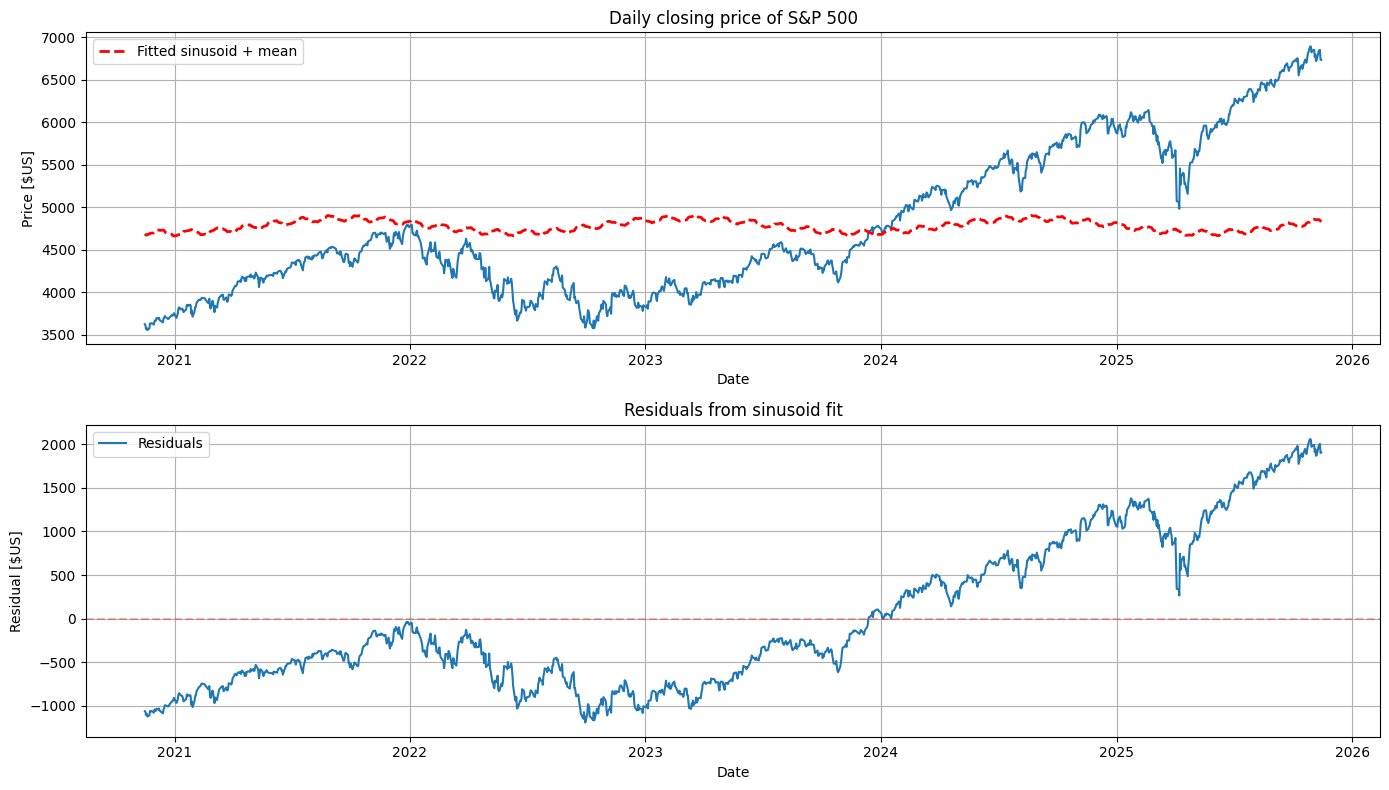

In [122]:
fit_sinusoids_on_data(df_sp500_close, [1/7, 1/30, 1/365], "Daily closing price of S&P 500", "Price", "$US")

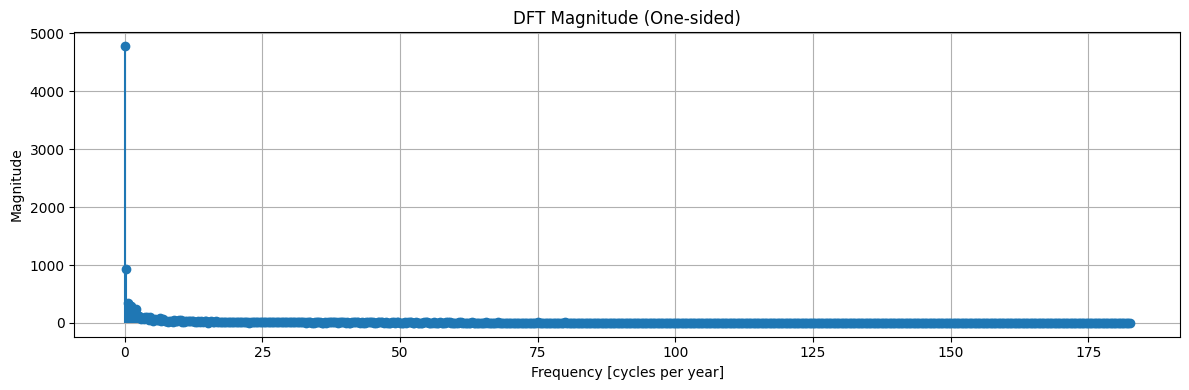

Daily closing price of S&P 500 DFT Analysis:
Detected peaks:
  5 peaks detected
  Frequencies
    Frequency: 0.00 Hz, Magnitude: 4781.0944
    Frequency: 0.29 Hz, Magnitude: 933.6943
    Frequency: 0.58 Hz, Magnitude: 335.4647
    Frequency: 0.87 Hz, Magnitude: 308.2541
    Frequency: 1.16 Hz, Magnitude: 285.2612




In [152]:
analyze_dft_frequencies("Daily closing price of S&P 500", df_sp500_close, 1/365, sample_spacing_name="year", include_plot=True)

For the S&P 500 daily closing prizes the expectation was that sinusoids of weekly, monthly and yearly periods could describe the signal most closely. This assumption was entirely false, since the residuals of the fitted sinusoids basically look like the original signal itself. The DFT supports this conclusion. It again shows the strongest contributor to be the DC part and all but one significant contributor frequecy to have a period longer between 1.15 and 3.4 years; most likely to the positive trend shown in the data lasting for multiple years.

---